In [1]:
# test what kind of frequency filter is exhibited by different neuron models.

In [2]:
import sys
sys.path.append("..\\") # parent directory
from AQUA_class import AQUA
from plotting_functions import *

import numpy as np
import matplotlib.pyplot as plt



In [3]:
def test_frequencies(neuron, freq, dt, N_iter, x_start, t_start, I_inj):
    spike_bool = np.zeros(len(freq))
    for n, f in enumerate(freq):
        neuron.Initialise(x_start, t_start)
        _, _, spikes = neuron.update_RK2(dt, N_iter, I_inj[n])
        if len(spikes) != 0:
            spike_bool[n] = len(spikes)
    return spike_bool

In [4]:
# simulation params for every run
T = 3000   # = 3 s
dt = 0.01
N_iter = int(T/dt)
steps_per_second = int(1000/dt)
print(steps_per_second)

x_start = np.array([-50., 0., 0.])
t_start = np.array([0.])

# 10 pulses at a set frequency? Max f = 10 000 Hz, min = 5 Hz
freq = np.linspace(18, 26, 16) # frequencies in Hz
print(freq)
I_h = 200
I_inj = np.zeros((len(freq), N_iter)) # each row is a different stimulation frequency


for n, f in enumerate(freq):
    steps = int(steps_per_second/f) 
    freq[n] = steps_per_second/steps

    I_inj[n][steps_per_second : steps_per_second + 5*steps + 1 : steps] = I_h 



100000
[18.         18.53333333 19.06666667 19.6        20.13333333 20.66666667
 21.2        21.73333333 22.26666667 22.8        23.33333333 23.86666667
 24.4        24.93333333 25.46666667 26.        ]


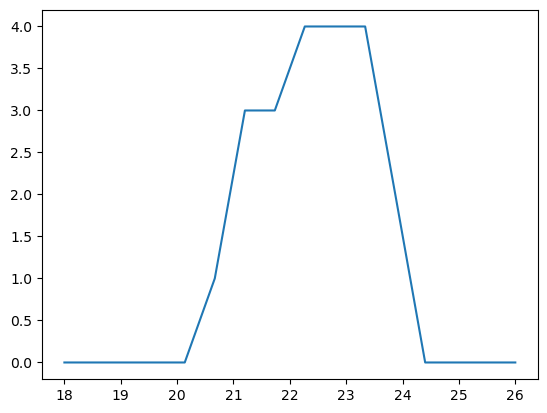

In [5]:
# Resonator neuron (RZ) - no autapse
a = 0.1
b = 0.26
c = -65
d = 2

neuron = AQUA(a, b, c, d)

"""
# testing
neuron.Initialise(x_start, t_start)
I_test = np.zeros(N_iter)
I_test[steps_per_second] = I_h
#X, T, spikes = neuron.update_RK2(dt, N_iter, I_test)
X, T, spikes = neuron.update_RK2(dt, N_iter, I_inj[9])
split = np.arange(int(0.95*steps_per_second), int(1.2*steps_per_second), 1)
plt.plot(T[split], X[0, split])
"""


# stimulate the resonator at different frequencies.
# store whether a spike occurred? yep
spike_bool = test_frequencies(neuron, freq, dt, N_iter, x_start, t_start, I_inj)
    
plt.plot(freq, spike_bool)



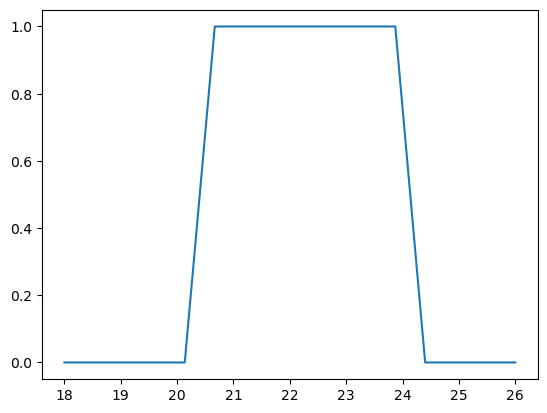

In [ ]:
# Resonator neuron (RZ) - no autapse
a = 0.1
b = 0.26
c = -65
d = 2

e = 0.3
f = 5
tau = 5

neuron2 = AQUA(a, b, c, d, e, f, tau)


# stimulate the resonator at different frequencies.
# store whether a spike occurred? yep
spike_bool2 = test_frequencies(neuron2, freq, dt, N_iter, x_start, t_start, I_inj)
    
plt.plot(freq, spike_bool2)


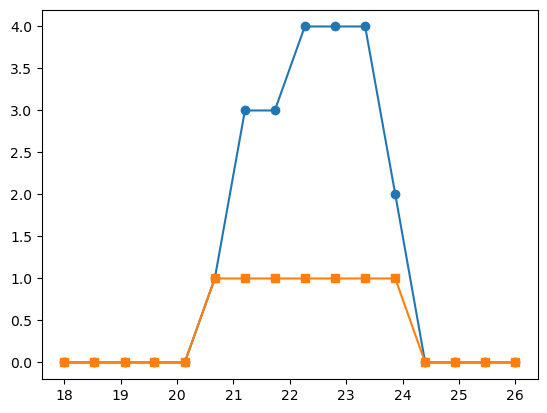

In [7]:
plt.plot(freq, spike_bool, marker = 'o')
plt.plot(freq, spike_bool2, marker = 's')

# Some autaptic variables will shunt all future spikes. While the pulses match the frequency of subthreshold oscillations, the autapse will knock subthresold oscillations out of phase.  

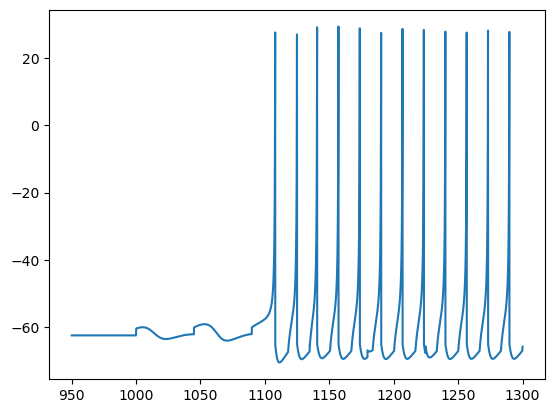

In [8]:
# Resonator neuron (RS) - autapse
# Autapse allows for persistent activity in the resonator neuron even when autaptic variables are reasonable. 
a = 0.1
b = 0.26
c = -65
d = 2

e = 0.3
f = 5
tau = 10

neuron2 = AQUA(a, b, c, d, e, f, tau)

I_test = np.zeros(N_iter)
I_test[steps_per_second] = 250
neuron2.Initialise(x_start, t_start)
#X, T, spikes = neuron2.update_RK2(dt, N_iter, I_test)
X, T, spikes = neuron2.update_RK2(dt, N_iter, I_inj[8])
split = np.arange(int(0.95*steps_per_second), int(1.3*steps_per_second), 1)
plt.plot(T[split], X[0, split])

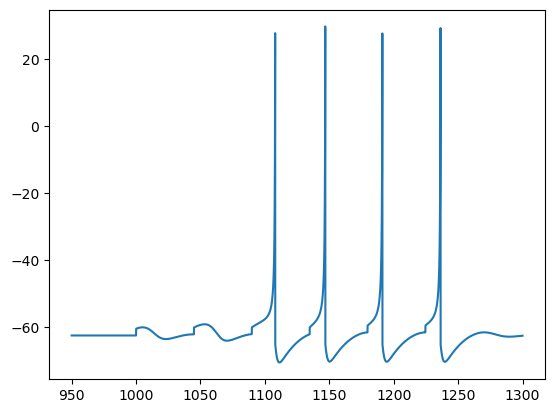

In [9]:

# testing, no autapse
neuron.Initialise(x_start, t_start)
I_test = np.zeros(N_iter)
I_test[steps_per_second] = I_h
#X, T, spikes = neuron.update_RK2(dt, N_iter, I_test)
X, T, spikes = neuron.update_RK2(dt, N_iter, I_inj[8])
split = np.arange(int(0.95*steps_per_second), int(1.3*steps_per_second), 1)
plt.plot(T[split], X[0, split])
